In [36]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [19]:
df=pd.read_csv(r"C:\Users\kashr\Downloads\imarticus project\Housing dataset\housing.csv")

In [20]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [21]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [22]:
df.shape

(20640, 10)

In [23]:
mean_total_bedrooms=df['total_bedrooms'].mean()
median_total_bedroom=df['total_bedrooms'].median
df['total_bedrooms'].fillna(mean_total_bedrooms, inplace=True)

In [24]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [38]:
X=df.drop(columns='median_house_value')
y=df['median_house_value']

In [27]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [28]:
replace_dict={'<1H OCEAN':1,'INLAND':2,'NEAR OCEAN':3,'NEAR BAY':4,'ISLAND':5}

In [30]:
df['ocean_proximity']=df['ocean_proximity'].replace(replace_dict)

C:\Users\kashr\AppData\Local\Temp\ipykernel_18080\3472613350.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['ocean_proximity']=df['ocean_proximity'].replace(replace_dict)


In [31]:
df['ocean_proximity'].value_counts()

ocean_proximity
1    9136
2    6551
3    2658
4    2290
5       5
Name: count, dtype: int64

In [33]:
correlation_matrix=df.corr()

In [34]:
correlation_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069260,0.099773,0.055310,-0.015176,-0.045967,-0.439870
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066658,-0.108785,-0.071035,-0.079809,-0.144160,0.390957
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.318998,-0.296244,-0.302916,-0.119034,0.105623,0.145163
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927253,0.857126,0.918484,0.198050,0.134153,-0.016309
total_bedrooms,0.069260,-0.066658,-0.318998,0.927253,1.000000,0.873910,0.974725,-0.007682,0.049454,-0.021358
population,0.099773,-0.108785,-0.296244,0.857126,0.873910,1.000000,0.907222,0.004834,-0.024650,-0.083537
households,0.055310,-0.071035,-0.302916,0.918484,0.974725,0.907222,1.000000,0.013033,0.065843,-0.027144
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007682,0.004834,0.013033,1.000000,0.688075,-0.039673
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049454,-0.024650,0.065843,0.688075,1.000000,0.021732
ocean_proximity,-0.439870,0.390957,0.145163,-0.016309,-0.021358,-0.083537,-0.027144,-0.039673,0.021732,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

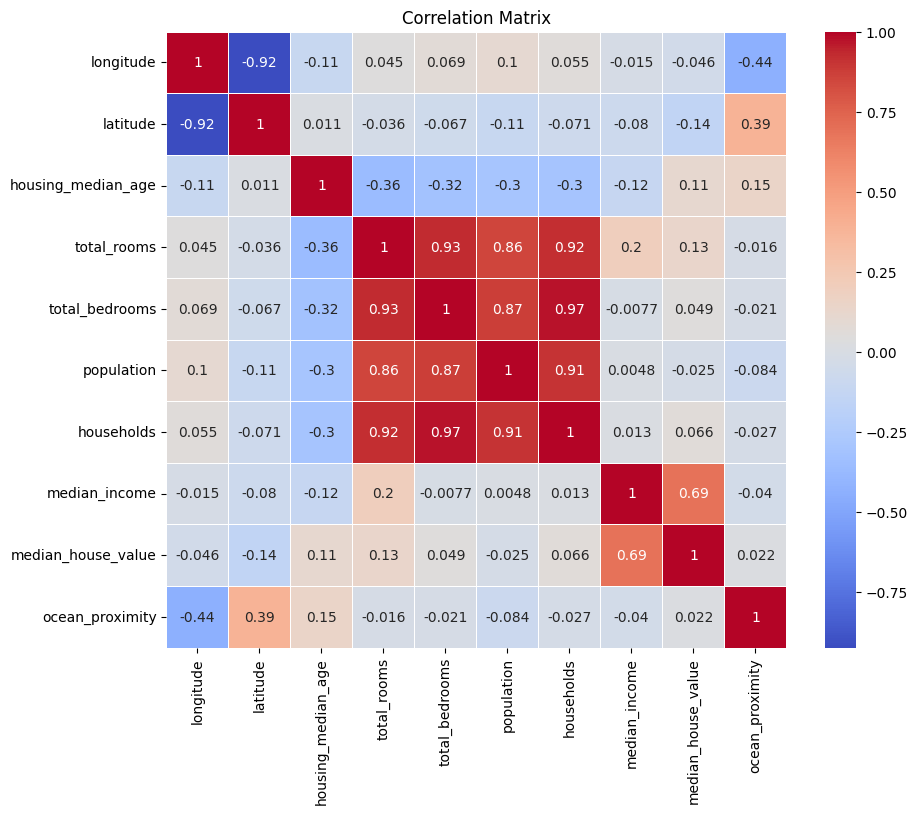

In [37]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',linewidths=0.5)
plt.title('Correlation Matrix')

In [54]:
X=df[['housing_median_age','total_rooms','median_income','total_bedrooms','households','ocean_proximity']]
y=df['median_house_value']

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [57]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor(max_depth=5,random_state=42)

In [58]:
model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [61]:
from sklearn.metrics import mean_squared_error,r2_score
y_pred=model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
print('Mean squared error is:',mse)

Mean squared error is: 5321149262.924276


In [62]:
r2score=r2_score(y_test,y_pred)


In [63]:
r2score

0.5939321729871374

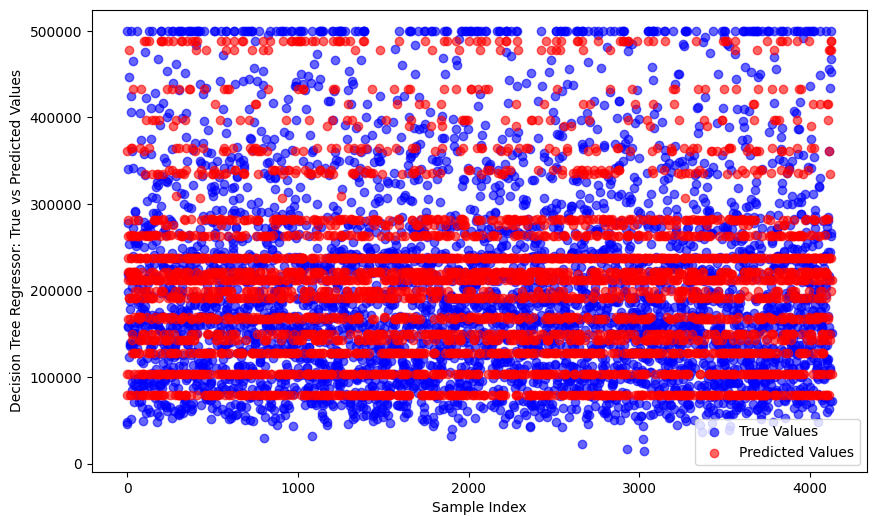

In [60]:
plt.figure(figsize=(10,6))
plt.scatter(range(len(y_test)),y_test,color='blue',label='True Values',alpha=0.6)
plt.scatter(range(len(y_pred)),y_pred,color='red',label='Predicted Values',alpha=0.6)
plt.xlabel('Sample Index')
plt.ylabel('Decision Tree Regressor: True vs Predicted Values')
plt.legend()
plt.show()